# Preprocessing

In [1]:
# math and data packages
import pandas as pd
import numpy as np
import math

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display, Math, Latex



## Import data

Fix any known formatting problems here

In [2]:
# make slugs for species and places

# function to make the species slugs
def to_slug(x):
    try: 
        int_data = x.strip().split()
        data = int_data[:2]
        data = "-".join(data)
        data = data.lower()
    except:
        data = "none"
    return data

survey_data = pd.read_csv("resources/surveys.csv")
a, b = pd.read_csv("resources/data-2021-1.csv"), pd.read_csv("resources/data-2021-2.csv")
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   place   935 non-null    object
 1   date    935 non-null    object
 2   time    756 non-null    object
 3   sci     935 non-null    object
 4   name    671 non-null    object
dtypes: object(5)
memory usage: 36.6+ KB


In [3]:
a["date"].head()

0    03.04.21
1    03.04.21
2    03.04.21
3    03.04.21
4    03.04.21
Name: date, dtype: object

In [4]:
a["adate"] = a["date"].astype(str)
a["date"] = a["adate"].map(lambda x: f"20{x[-2:]}-{x[3:5]}-{x[:2]}")
a = a[~(a['date'] == "20an--na")]

In [5]:
a["date"].head()

0    2021-04-03
1    2021-04-03
2    2021-04-03
3    2021-04-03
4    2021-04-03
Name: date, dtype: object

In [6]:
b["date"].head()

0    06/27/21 06:59 PM
1    06/27/21 07:00 PM
2    06/27/21 07:00 PM
3    06/27/21 07:00 PM
4    06/27/21 07:00 PM
Name: date, dtype: object

In [7]:
b["adate"] = b["date"].map(lambda x: x[:8])
b["date"] =  b["adate"].map(lambda x: f"20{x[-2:]}-{x[0:2]}-{x[3:5]}")
b["date"].head()

0    2021-06-27
1    2021-06-27
2    2021-06-27
3    2021-06-27
4    2021-06-27
Name: date, dtype: object

In [8]:
b["date"].min()

'2021-03-23'

In [9]:
a["date"].min()

'2021-02-01'

In [10]:
survey_data.rename(columns={"sci":"species"}, inplace=True)
survey_data['loc_date'] = list(zip(survey_data.place, survey_data['date']))
survey_data["year"]=1

In [11]:
survey_data.head()

,place,date,time,species,name,loc_date,year
0,alleestrasse 1,2020-09-02,11:09:04 AM,plantago lanceolata,plantain lancéolé,"(alleestrasse 1, 2020-09-02)",1
1,alleestrasse 1,2020-09-02,11:08:19 AM,centaurea nigra,centaurée noire,"(alleestrasse 1, 2020-09-02)",1
2,alleestrasse 1,2020-09-02,11:06:59 AM,plantago media,plantain moyen,"(alleestrasse 1, 2020-09-02)",1
3,alleestrasse 1,2020-09-02,11:06:05 AM,chenopodium album agg.,chénopode blanc,"(alleestrasse 1, 2020-09-02)",1
4,alleestrasse 1,2020-09-02,11:05:18 AM,centaurea jacea agg.,centaurée jacée,"(alleestrasse 1, 2020-09-02)",1


In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3199 entries, 0 to 3198
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             3199 non-null   object 
 1   place            3199 non-null   object 
 2   feature          3199 non-null   object 
 3   number           3199 non-null   float64
 4   species          3195 non-null   object 
 5   quantity         1683 non-null   object 
 6   confidence       2130 non-null   float64
 7   no_flowers       64 non-null     object 
 8   notes            60 non-null     object 
 9   Full-place-name  3199 non-null   object 
 10  adate            3199 non-null   object 
dtypes: float64(2), object(9)
memory usage: 299.9+ KB


In [13]:
a["year"]=2
a.head()

,date,place,feature,number,species,quantity,confidence,no_flowers,notes,Full-place-name,adate,year
0,2021-04-03,zukunftstrasse,box,1.0,Viburnum farreri,2,2.0,NaN,NaN,zukunftstrasse-box-1,03.04.21,2
1,2021-04-03,zukunftstrasse,box,1.0,Quercus suber,1,1.0,NaN,NaN,zukunftstrasse-box-1,03.04.21,2
2,2021-04-03,zukunftstrasse,box,1.0,Prunus avium,1,0.0,NaN,NaN,zukunftstrasse-box-1,03.04.21,2
3,2021-04-03,zukunftstrasse,box,2.0,Viburnum farreri,2,2.0,NaN,NaN,zukunftstrasse-box-2,03.04.21,2
4,2021-04-03,zukunftstrasse,box,2.0,Quercus suber,1,1.0,NaN,NaN,zukunftstrasse-box-2,03.04.21,2


In [14]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   obs_id                3809 non-null   float64
 1   date                  3813 non-null   object 
 2   place                 3813 non-null   object 
 3   species               3813 non-null   object 
 4   determinavit_cf       3809 non-null   object 
 5   municipality.id       3811 non-null   float64
 6   municipality.name     3811 non-null   object 
 7   municipality_expert   3809 non-null   object 
 8   srid                  3809 non-null   float64
 9   x                     3809 non-null   float64
 10  y                     3809 non-null   float64
 11  geometry              3809 non-null   object 
 12  xy_type               3809 non-null   object 
 13  xy_precision          3809 non-null   float64
 14  geo_expert            3809 non-null   object 
 15  altitude_min         

In [15]:
bcolumns = ["date", "place", "species", "year"]
b["year"]=2

In [16]:
c = pd.concat([survey_data[bcolumns], a[bcolumns], b[bcolumns]])

In [17]:
c.head()

,date,place,species,year
0,2020-09-02,alleestrasse 1,plantago lanceolata,1
1,2020-09-02,alleestrasse 1,centaurea nigra,1
2,2020-09-02,alleestrasse 1,plantago media,1
3,2020-09-02,alleestrasse 1,chenopodium album agg.,1
4,2020-09-02,alleestrasse 1,centaurea jacea agg.,1


In [18]:
c["loc_date"], a["loc_date"], b["loc_date"] = list(zip(c.place, c["date"])), list(zip(a.place, a["date"])), list(zip(b.place, b["date"]))

c["acopy"] = c.species

replacedict = {
    'verbanum bonariensis ':'verbena bonariensis',
    'medicago varia':'medicago sativa',
    "oenothera":"oenothera biennis",
    "geranium pratens":"geranium pratense",
    "oenothera biennis ": "oenothera biennis",
    "oenothera biennis agg.": "oenothera biennis",
    "solidalgo canadensis": "solidago canadensis",
    "verbascum lynchitis":"verbascum lychnitis",
    "verbascum negris":"verbascum nigrum",
    "securigea varia": "securigera varia",
    "melilotus officianalis": "melilotus officinalis",
    "knautia maxima": "knautia dipsacifolia",
    "hieracium aurantiacum":"pilosella aurantiaca",
    "sysimbrium officinale":"sisymbrium officinale",
    "geranium robertanium":"geranium robertianum",
    "mycelis muralis": "lactuca muralis",
    "calamintha-nepeta":"clinopodium nepeta",
    "polygonum-persicaria":"persicaria maculosa",
    "sorbus-aria":"aria edulis",
    "taraxacum": "taraxacum officinale",
    "jacobaea vulgaris" : "senecio jacobaea",
    "erigeron canadensis" : "conyza canadensis",
    "rorippa islandica" : "rorippa palustris",
    "malus sylvestris" : "malus domestica",
    "hylotelephium telephium" : "sedum telephium",
    "lactuca muralis": "mycelis muralis",
    "chaenorhinum minus": "chaenorrhinum minus",
    "erigeron canadensis": "conzya canadensis",
    "erigeron canadensis": "conzya canadensis",
    "borkhausenia intermedia": "scandosorbus intermedia",
    "centaurea nigra" : "centaurea jacea"
}

# function to assign the correct value of the key is in the samples dictionary.
def replace_names(x,keys):
    
    if x in keys:
        data = keys[x]
    else:
        data = x
    
    return data
c["acopy"] = c.acopy.map(lambda x: replace_names(x,replacedict))


c["species"] = c.acopy.map(lambda x: to_slug(x))

c.head()   

,date,place,species,year,loc_date,acopy
0,2020-09-02,alleestrasse 1,plantago-lanceolata,1,"(alleestrasse 1, 2020-09-02)",plantago lanceolata
1,2020-09-02,alleestrasse 1,centaurea-jacea,1,"(alleestrasse 1, 2020-09-02)",centaurea jacea
2,2020-09-02,alleestrasse 1,plantago-media,1,"(alleestrasse 1, 2020-09-02)",plantago media
3,2020-09-02,alleestrasse 1,chenopodium-album,1,"(alleestrasse 1, 2020-09-02)",chenopodium album agg.
4,2020-09-02,alleestrasse 1,centaurea-jacea,1,"(alleestrasse 1, 2020-09-02)",centaurea jacea agg.


In [19]:
print(c.loc_date.nunique(), (a.loc_date.nunique() + b.loc_date.nunique()), survey_data.loc_date.nunique())

560 417 143


In [20]:
c.groupby("year").loc_date.nunique()

year
1    143
2    417
Name: loc_date, dtype: int64

In [21]:
print(c.place.nunique(), (a.place.nunique() + b.place.nunique()), survey_data.place.nunique())

377 267 111


In [22]:
c.groupby("year").place.nunique()

year
1    111
2    267
Name: place, dtype: int64

In [23]:
def asplit(x):
    akey=x
    int_data = x.strip().split("-")
    return int_data, akey

def check_length(x):
    data = len(x[0])
    return data, x[0], x[1]

def new_data(data, suffixes, threecharacters, twocharacters):
    
    if data[0] == 1:        
        if data[1][0].endswith(suffixes):
            new_x = data[1][:-4]
        elif data[1][0].endswith(threecharacters):
            new_x = data[1][:-3]
        else:
            new_x = data[1][0]
    else:
        
        if data[1][1] in suffixes:
            new_x = data[1][0]
        elif data[1][1].endswith(threecharacters):
            new_x = data[1][0]
        elif data[1][1].endswith(twocharacters):
            new_x = data[1][0]
        else:
            new_x = "-".join(data[1])            
    
    return {data[2]:new_x}
            
# data = "-".join(data)           
intermediate = [asplit(x) for x in c.species.sort_values().unique()]

lengths = [check_length(x) for x in intermediate]

new_names = [new_data(x, ("cf.", "sp."), ("sp", "cf"), ("x")) for x in lengths]

re_names = {k:v for x in new_names for k,v in x.items()}

def replace_genus(x, key):
    return key[x]

In [24]:
c["newname"] = c.species.map(lambda x: replace_genus(x, re_names))
c["species"] = c.newname

c.drop(["newname", "acopy"], axis=1, inplace=True)
c = c.reset_index(drop=True)

c = c[~c.species.isin(["none"])]
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7943 entries, 0 to 7946
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      7943 non-null   object
 1   place     7943 non-null   object
 2   species   7943 non-null   object
 3   year      7943 non-null   int64 
 4   loc_date  7943 non-null   object
dtypes: int64(1), object(4)
memory usage: 372.3+ KB


In [25]:
print(c.species.nunique(),  len(set([to_slug(x) for x in survey_data.species.unique()])))

659 239


In [26]:
c.groupby("year").species.nunique()

year
1    232
2    590
Name: species, dtype: int64

In [27]:
c.to_csv("resources/inprocess/combined_survey_data.csv", index=False)

In [28]:
# n per static count of surveys locations and speicies
def nSurveys(data, query="species", args=[]):
    return data[data[query].isin(args)].loc_date.nunique()

def nLocation(data, species="species", genus_species=[]):
    return data[data[species].isin(genus_species)].place.nunique()

def nSpecies(data, place="place", places=[]):
    return data[data[place].isin(places)].species.nunique()

def total_sls(data):
    surveys = data.loc_date.nunique()
    locations = data.place.nunique()
    species = data.species.nunique()
    
    return {"surveys":surveys, "places":locations, "species":species}

c["date"] = pd.to_datetime(c["date"])
c["month"] = c["date"].dt.month
genus_species = c.species.unique()
places = c.place.unique()

x = c[c["place"].isin(places)].copy()

In [29]:
# location report:

# surveys per year per location:
def nSamplesPerYearPlace(data):
    return data.groupby(['year', 'place'], as_index=False).loc_date.nunique()

def nSpeciesPerSample(data):
    return data.groupby(["loc_date", "date", "place"], as_index=False).species.count()

def aSpeciesPerSample(data, species=[]):
    """The per sample data for a species
    """
    new_data = nSpeciesPerSample(data[data["species"].isin(species)])
    new_data.rename(columns={"species":species[0]}, inplace=True)
    return new_data

def speciesPlaceNsamps(data):
    return data.groupby(["species", "place"], as_index=False).loc_date.nunique()

def pivot_this(data, colnames, index, column, value):
    return data[colnames].pivot(index=index, columns=column, values=value).fillna(0)

def speciesPerLocation(data,colnames, index="species",columns="place",values="loc_date"):
    """Uses speciesPlaceNsamps to return a matrix of species and locations with value of
    number of times identified at that location
    """
    return pivot_this(data, colnames, index, columns, values)

def speciesPlace(species_data, soi):
    """Uses speciesPerlocation to report on one species"""
    return species_data.loc[soi, (species_data.loc[soi] > 0)]

# samples per year per location
samps_year = nSamplesPerYearPlace(x)
samps_year.head()

,year,place,loc_date
0,1,alleestrasse 1,2
1,1,alleestrasse 2,1
2,1,alleestrasse 3,2
3,1,alleestrasse 4,3
4,1,bluets 1,1


In [30]:
# samples per year
samps_year.groupby("year").loc_date.sum()

year
1    143
2    414
Name: loc_date, dtype: int64

In [31]:
# n species per sample
aplot = nSpeciesPerSample(x)
aplot.head()

,loc_date,date,place,species
0,"(Alexander-Moser-Strasse, 2021-04-12)",2021-04-12,Alexander-Moser-Strasse,11
1,"(Alexander-moser-strasser-berm-1, 2021-08-09)",2021-08-09,Alexander-moser-strasser-berm-1,8
2,"(Alfermee-beach-1, 2021-08-20)",2021-08-20,Alfermee-beach-1,30
3,"(Alfermee-forest-1, 2021-08-20)",2021-08-20,Alfermee-forest-1,21
4,"(Alfred-aebi-strasse, 2021-03-28)",2021-03-28,Alfred-aebi-strasse,9


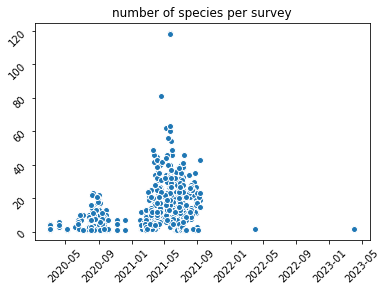

In [32]:
fig, ax=plt.subplots()
ax.scatter(x=pd.to_datetime(aplot["date"]), y=aplot.species, edgecolor="white")
ax.set_title("number of species per survey")
ax.tick_params(rotation=45)
plt.show()

In [33]:
colnames = ["species", "place", "loc_date"]
species_data = speciesPerLocation(speciesPlaceNsamps(x),colnames)
species_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659 entries, abies-alba to viola-reichenbachiana
Columns: 375 entries, Alexander-Moser-Strasse to zukunftstrasse
dtypes: float64(375)
memory usage: 1.9+ MB


In [34]:
# of times seen per location
species_data[species_data.columns[:10]].head()

place,Alexander-Moser-Strasse,Alexander-moser-strasser-berm-1,Alfermee-beach-1,Alfermee-forest-1,Alfred-aebi-strasse,Alfred-aebi-strasse-area-1,Alfred-aebi-strasse-area-10,Alfred-aebi-strasse-area-2,Alfred-aebi-strasse-area-3,Alleestrasse
species,,,,,,,,,,
abies-alba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acer,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
acer-campestre,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
acer-negundo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acer-platanoides,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# locations and number of times where a species was spotted
soi = "acer"
a_species_data = speciesPlace(species_data, soi)
a_species_data

place
Alfred-aebi-strasse-area-10    1.0
Alfred-aebi-strasse-area-3     1.0
Alleestrasse-lot-1             1.0
Freiburgstrasse-berm-1         1.0
Freiburgstrasse-berm-2         1.0
Gartenstrasse-area-1           1.0
Mettstrasse-area-1             1.0
Mettstrasse-area-2             1.0
Muehlestrasse-suze-1           1.0
Sbb-area-2                     1.0
Sbb-area-3                     1.0
Schwanengasse-area-1           1.0
Seefelsweg-berm-1              1.0
ignore                         2.0
mettstrasse                    1.0
schloesslifeld                 1.0
Name: acer, dtype: float64

In [36]:
# of times seen in total
species_data.sum(axis=1).head()

species
abies-alba           1.0
acer                17.0
acer-campestre       7.0
acer-negundo         1.0
acer-platanoides     1.0
dtype: float64

In [37]:
# of times it was seen relation to number of surveys
dtotals = total_sls(x)
species_data.sum(axis=1)/dtotals["surveys"]                    

species
abies-alba                   0.001795
acer                         0.030521
acer-campestre               0.012567
acer-negundo                 0.001795
acer-platanoides             0.001795
                               ...   
vincetoxicum-hirundinaria    0.001795
viola-alba                   0.005386
viola-hirta                  0.007181
viola-odorata                0.046679
viola-reichenbachiana        0.016158
Length: 659, dtype: float64

In [38]:
# the persample data for a species
a_species_data = aSpeciesPerSample(x, species=["veronica-hederifolia"])

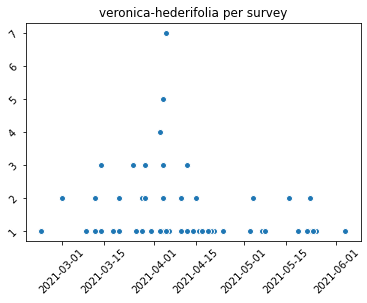

In [39]:
fig, ax=plt.subplots()
ax.scatter(x=pd.to_datetime(a_species_data["date"]), y=a_species_data["veronica-hederifolia"], edgecolor="white")
ax.set_title("veronica-hederifolia per survey")
ax.tick_params(rotation=45)
plt.show()

In [40]:
a_species_data.head()

,loc_date,date,place,veronica-hederifolia
0,"(Alfred-aebi-strasse, 2021-03-28)",2021-03-28,Alfred-aebi-strasse,1
1,"(Alfred-aebi-strasse, 2021-04-04)",2021-04-04,Alfred-aebi-strasse,2
2,"(Alleestrasse, 2021-04-04)",2021-04-04,Alleestrasse,2
3,"(Alleestrasse, 2021-04-10)",2021-04-10,Alleestrasse,2
4,"(Alleestrasse, 2021-05-07)",2021-05-07,Alleestrasse,1


## Determine wether or not a species was detected within a geographic limit

The territory is divided into different segments. Flora-helvitica and WS maps have different geographic bounds. Here the presence or not of a species within the confines of one of the different boundaries is determined.

### Key the species to the different maps it was identified in


## Format date column to ISO standard